## Computational Playground (LLL Reduction)

Start by running the following cell (click inside it and then press Shift-Enter) to load some computational tools you can use.

In [1]:
from toolkit import *

## Examples

Here are some examples of how to use the Proj and Rem functions. In the first case, we project onto the space spanned by a single vector.

The projection of v onto b is [5.7 1.9]
The remainder of projection of v onto b is [-0.7  2.1]


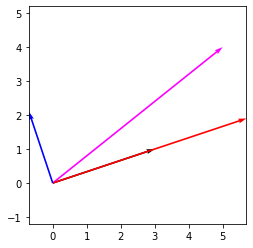

Angle of v with b is 20.224859431168078 degrees
Angle of projection with b is 1.2074182697257333e-06 degrees
Angle of remainder with b is 89.99999999999999 degrees


In [2]:
b = np.array([3,1])
v = np.array([5,4])

p = Proj([b], v)
r = Rem([b], v)

print("The projection of v onto b is "+str(p))
print("The remainder of projection of v onto b is "+str(r))

plotvectors([b,v,p,r],['black','magenta','red','blue'])

print("Angle of v with b is "+str(angle(v,b))+" degrees")
print("Angle of projection with b is "+str(angle(p,b))+" degrees")
print("Angle of remainder with b is "+str(angle(r,b))+" degrees")


We can also do this with higher dimensions and more vectors, even though it becomes harder to visualize.

In [12]:
b1 = np.array([1,0,-10**-6])
b2 = np.array([1/2,sqrt(3)/2,2*10**-6])
b3 = np.array([-1/2,sqrt(3)/2,-3*10**-6])

b1star = Rem([], b1)
b2star = Rem([b1], b2)
b3star = Rem([b1,b2], b3)

print("Angle of b2star with b1 is "+str(angle(b2star, b1))+" degrees")
print("Angle of b3star with b1 is "+str(angle(b3star, b1))+" degrees")
print("Angle of b3star with b2 is "+str(angle(b3star, b2))+" degrees")

Angle of b2star with b1 is 90.0 degrees
Angle of b3star with b1 is 90.00000000085289 degrees
Angle of b3star with b2 is 90.00000000067199 degrees


Another useful function is "Findn." This will return an integer which makes v+nu as short as possible. If you provide a nonempty list, it will first take the remainder of projection onto that list, and then find the best n.

In [23]:
u = np.array([4860,-2])
v = np.array([11800,2])

n=Findn([], [4860,-2],[11800,2])
print("v + " + str(n) + "u = " + str(v+n*u) + " is shorter than " + str(v+(n+1)*u) + " and "+str(v+(n-1)*u))

u1 = np.array([1,0,0])
u2 = np.array([1/4,1,0])
u3 = np.array([0,5,1/2])

m=Findn([u1], u2, u3)
print("Size-reducing {u2, u3} results in the vector u3 + " + str(m) + "u2 = " + str(u3+m*u2) + ".")
print("This has remainder " + str(Rem([u1], u3+m*u2)) + " after projection onto u1.")


v + -2.0u = [2080.    6.] is shorter than [6.94e+03 4.00e+00] and [-2780.     8.]
Size-reducing {u2, u3} results in the vector u3 + -5.0u2 = [-1.25  0.    0.5 ].
This has remainder [0.  0.  0.5] after projection onto u1.


## Workspace

In [195]:
u=u1
v=u2
w=u3

In [196]:
v = v + u*Findn([],u,v)
print(length(u))
print(length(v))

1.0
1.0307764064044151


In [202]:
[u,v] = [v,u]
v = v + u*Findn([],u,v)
print(length(u))
print(length(v))

0.5590169943749475
0.9013878188659973


In [203]:
w += v * Findn([u],v,w)
w += u * Findn([],u,w)
print(length(u))
print(length(v))
print(length(Rem([u],v)))
print(length(Rem([u],w)))

0.5590169943749475
0.9013878188659973
0.894427190999916
1.02469507659596


In [198]:
[v,w] = [w,v]
w += v * Findn([u],v,w)
w += u * Findn([],u,w)
print(length(u))
print(length(v))
print(length(Rem([u],v)))
print(length(Rem([u],w)))

1.0
0.5590169943749475
0.5
1.0


In [204]:
u

array([-0.25,  0.  ,  0.5 ])

In [205]:
v

array([0.75, 0.  , 0.5 ])

In [206]:
w

array([0.25, 1.  , 0.  ])

In [116]:
-16*(0.4708709)+43*(0.4708709**2)

1.99999999207283